<a href="https://colab.research.google.com/github/muhammadbuushiri/TUGAS-PYTHON/blob/main/CNN_KLASIFIKASI_DAUN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [4]:
ls

 3scene/
 Bekantan.jpg
'CNN KLASIFIKASI DAUN.ipynb'
 dataset_daun/
'image classification Muhammad Buushiri.ipynb'
 nnmodel_scene/
 scenes_nn_4_layers.ipynb
'tugas image classification  (1).ipynb'
'tugas image classification .ipynb'
 Untitled
 Untitled0.ipynb
 Untitled1.ipynb


In [5]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [6]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset_daun")
data = []
labels = []

[INFO] loading images...


In [7]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [8]:
print(labels)

['GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11',

In [11]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [12]:
print(labels)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [13]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(455, 64, 64, 3)
(152, 64, 64, 3)


In [57]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(150, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 29, 29, 32)        2336      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 150)               940950    
_________________________________________________________________
dense_33 (Dense)             (None, 5)               

In [58]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [59]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
15/15 [==============================] - 0s 13ms/step - loss: 0.4944 - accuracy: 0.2593 - val_loss: 0.4706 - val_accuracy: 0.3882
Epoch 2/25
15/15 [==============================] - 0s 6ms/step - loss: 0.4510 - accuracy: 0.3934 - val_loss: 0.4490 - val_accuracy: 0.3487
Epoch 3/25
15/15 [==============================] - 0s 7ms/step - loss: 0.4179 - accuracy: 0.4549 - val_loss: 0.4176 - val_accuracy: 0.4276
Epoch 4/25
15/15 [==============================] - 0s 6ms/step - loss: 0.3638 - accuracy: 0.5451 - val_loss: 0.3864 - val_accuracy: 0.4868
Epoch 5/25
15/15 [==============================] - 0s 7ms/step - loss: 0.3147 - accuracy: 0.6681 - val_loss: 0.3728 - val_accuracy: 0.5461
Epoch 6/25
15/15 [==============================] - 0s 7ms/step - loss: 0.2857 - accuracy: 0.6945 - val_loss: 0.3535 - val_accuracy: 0.5987
Epoch 7/25
15/15 [==============================] - 0s 6ms/step - loss: 0.2475 - accuracy: 0.7253 - val_loss: 0.3367 - val_accuracy: 0.6053
Epoch 8/25
15/15 [=

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


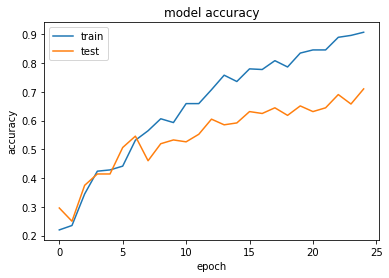

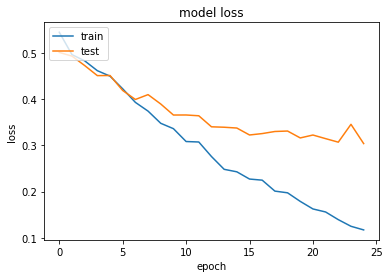

In [17]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()